In [1]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix

Using function to import datas

In [2]:
""" 
    "Black Hole Network 1", Node n8
    "Black Hole Network 2", Node nx
    "Black Hole Network 3", Node n8
    "Normal Network"        No BH

"""
dataList=coojaJsonImporter("./traces")
data=[]
for nodeList in dataList:
    data.append(createNodes(nodeList))
pings=[]
for i in range(len(data)):
    packetN=-1
    for j in range(len(data[i])):
        if(len(data[i][j].pkts)>packetN): packetN=len(data[i][j].pkts)
    pings.append(packetN)        
    
colors = [ 'orange','dodgerblue', 'green','red']
cases=[
      "Black Hole Network 1",
        "Black Hole Network 2",
    "Black Hole Network 3",
    "Normal Network"
      ]
casesD=["Case BH1 ","Case BH2","Case BH3","Case Normal"]
print(pings)

Importing test_1BH_P8_16nodes_2002019-01-29_21_40_55.json
Importing test_1BH_16nodes2018-11-09_19_46_22.json
Importing test_1BH_P8_16nodes_2002019-01-29_23_27_48.json
Importing test_norm_16nodes_5002019-01-29_18_56_03.json
[139, 78, 147, 166]


We print in 9 different Graph the packets RTT in Normal case, Black Hole 1 case and Black Hole 2 case

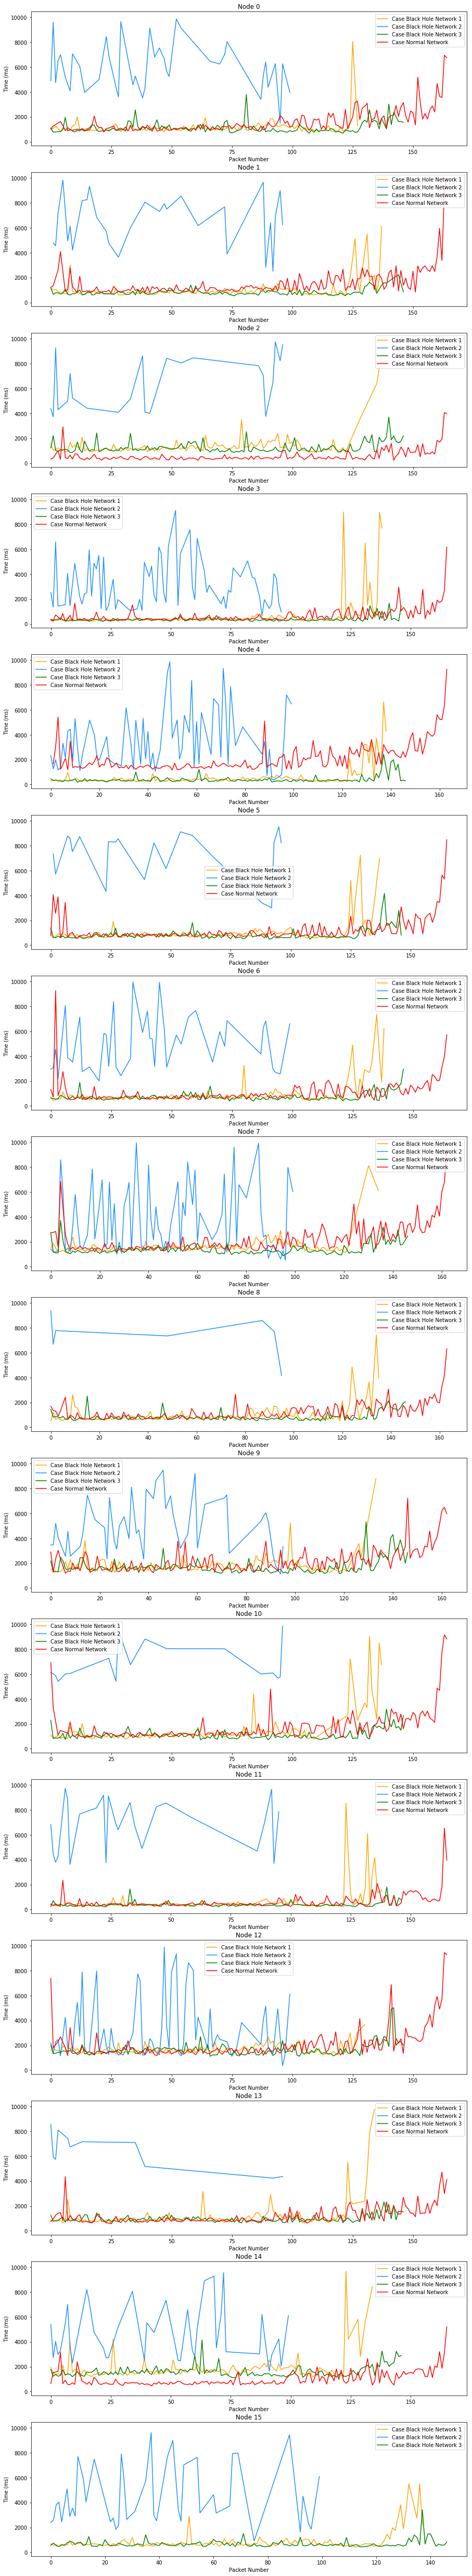

In [3]:
#It will be necessary when adding more Cases
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        axs[j].plot(data[i][j].pkts["pkt"],data[i][j].pkts["rtt"],label="Case " +str(cases[i]),color=colors[i]   )
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Packet Number")
        axs[j].set_ylabel("Time (ms)")
        axs[j].legend()

plt.show()

Distibution of the delay divided by Node in the differents Cases

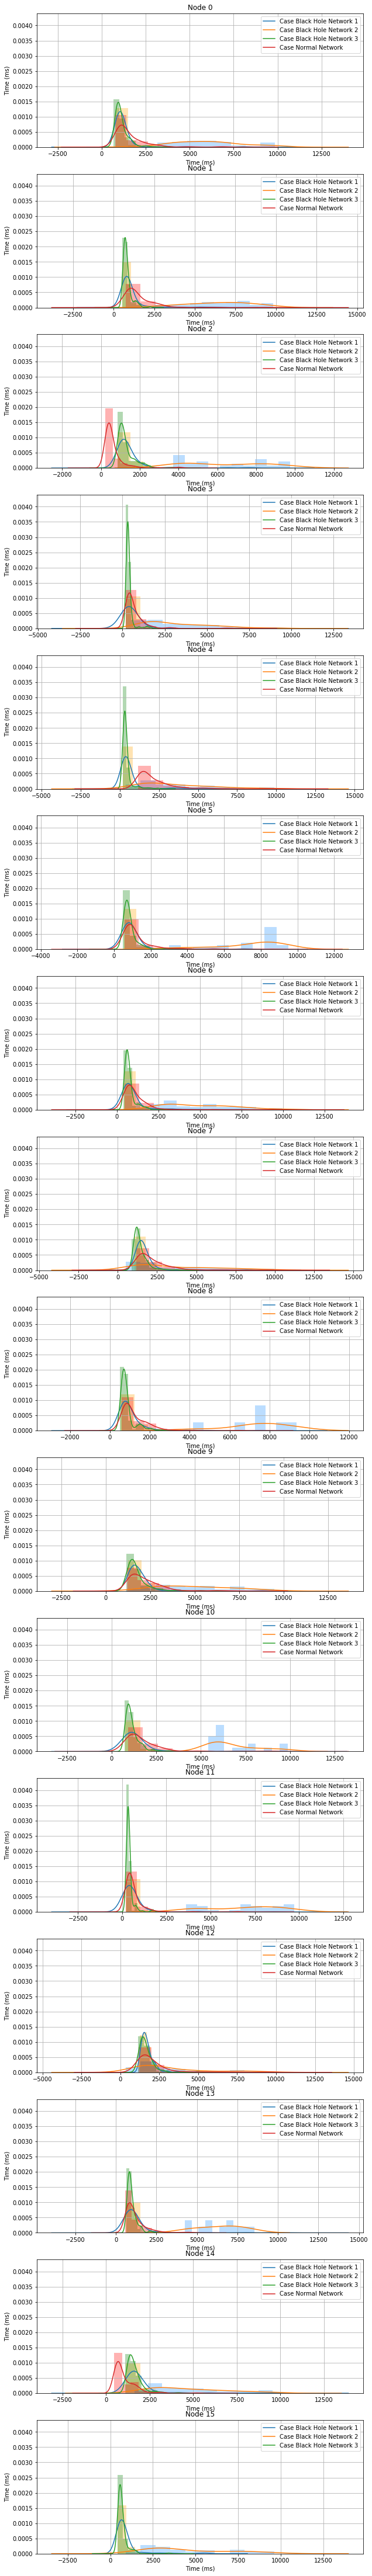

In [4]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(10,80),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j].pkts["rtt"].plot.kde(
            ax=axs[j],
            label="Case " +str(cases[i]),
            
        )
        axs[j].set_ylabel("Time (ms)")
        data[i][j].pkts["rtt"].hist(density=True,alpha=0.3,color=colors[i], ax=axs[j])
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Time (ms)")
        axs[j].legend()
    

Density of outliers in every node by Case

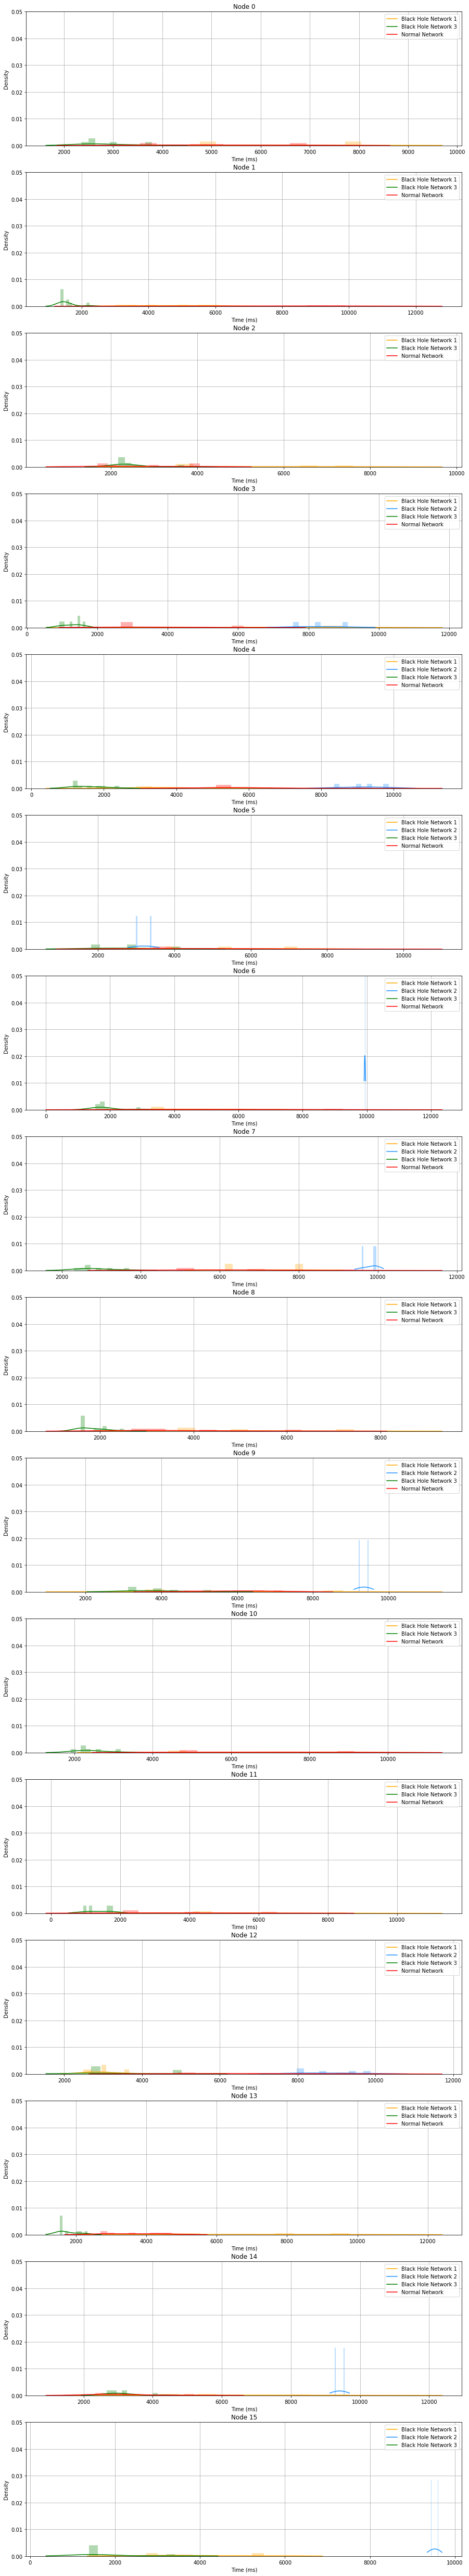

In [5]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        out=getOutliers(data[i][j].pkts)
        if not out.empty | len(out)<2 :
            axe=axs[j]
            out["rtt"].plot.kde(
            ax=axe,
            label=cases[i],
            color=colors[i]
            )
            axe.set_ylabel("Density")
            out["rtt"].hist(density=True,alpha=0.3, ax=axe, color=colors[i])
            axe.set_title("Node "+ str(j))
            axe.set_xlabel("Time (ms)")
            axe.legend()
            axs[j].set_ylim([0, 0.05])

Density of delay without outliers in every node by Case

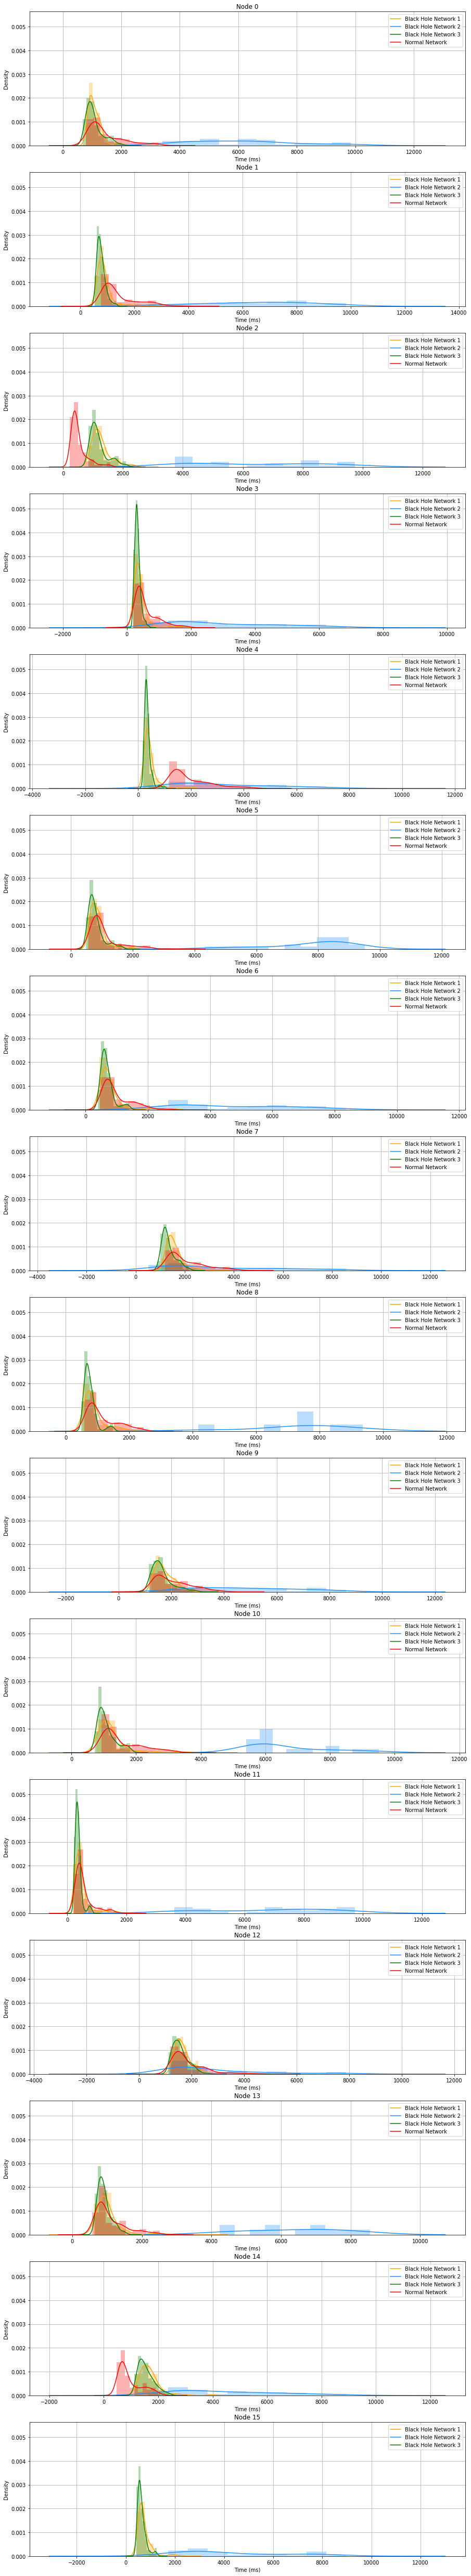

In [7]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        out=getStdValues(data[i][j].pkts)
        if not out.empty :
            ax=axs[j]
            out["rtt"].plot.kde(
            ax=ax,
            label=cases[i],
                 color=colors[i]
        )
            ax.set_ylabel("Density")
            out["rtt"].hist(density=True,alpha=0.3, ax=ax, color=colors[i])
            ax.set_title("Node "+ str(j))
            ax.set_xlabel("Time (ms)")
            ax.legend()

Data Preparation for Plot

In [8]:
hoplist=[]
df_a = pd.DataFrame( columns = ['pkt'])
dataHop=[]

listoflists = []
for i in range(len(data)):
    sublist = []
    for j in range(4):
        sublist.append((df_a))
    dataHop.append(sublist)
#print (listoflists)

for i in range(len(data)):
    col=[]
    for j in range(len(data[i])):
        hop=data[i][j].hop-1
        
        dataHop[i][hop]= pd.concat([dataHop[i][hop],data[i][j].pkts],sort=True)
        



Distribution of the delay in correlation with the Hops

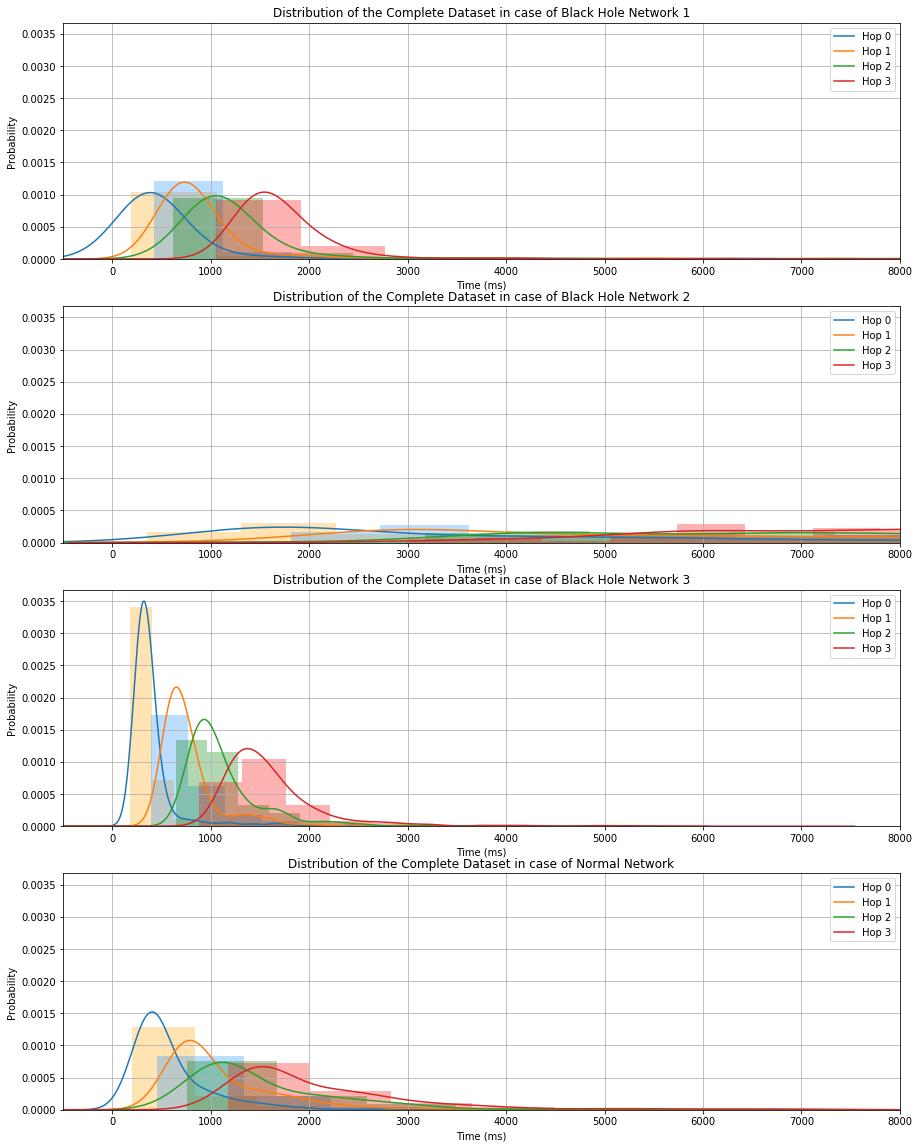

In [9]:
dataHopT=[*zip(*dataHop)]

fig, axs= plt.subplots(len(cases),1, figsize=(15,20),sharey=True )
for i in range(len(dataHopT)):
    for j in range(len(dataHopT[i])):
        
        dataHopT[i][j]['rtt'].plot.kde(
            ax=axs[j],
            label="Hop "+str(i),
        ) 
    
        dataHopT[i][j]["rtt"].hist(density=True,alpha=0.3, ax=axs[j],color=colors[i])
        axs[j].set_title("Distribution of the Complete Dataset in case of "+ cases[j])
        axs[j].set_xlabel("Time (ms)")
        axs[j].set_ylabel("Probability")
        axs[j].legend()
        axs[j].set_xlim([-500, 8000])

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

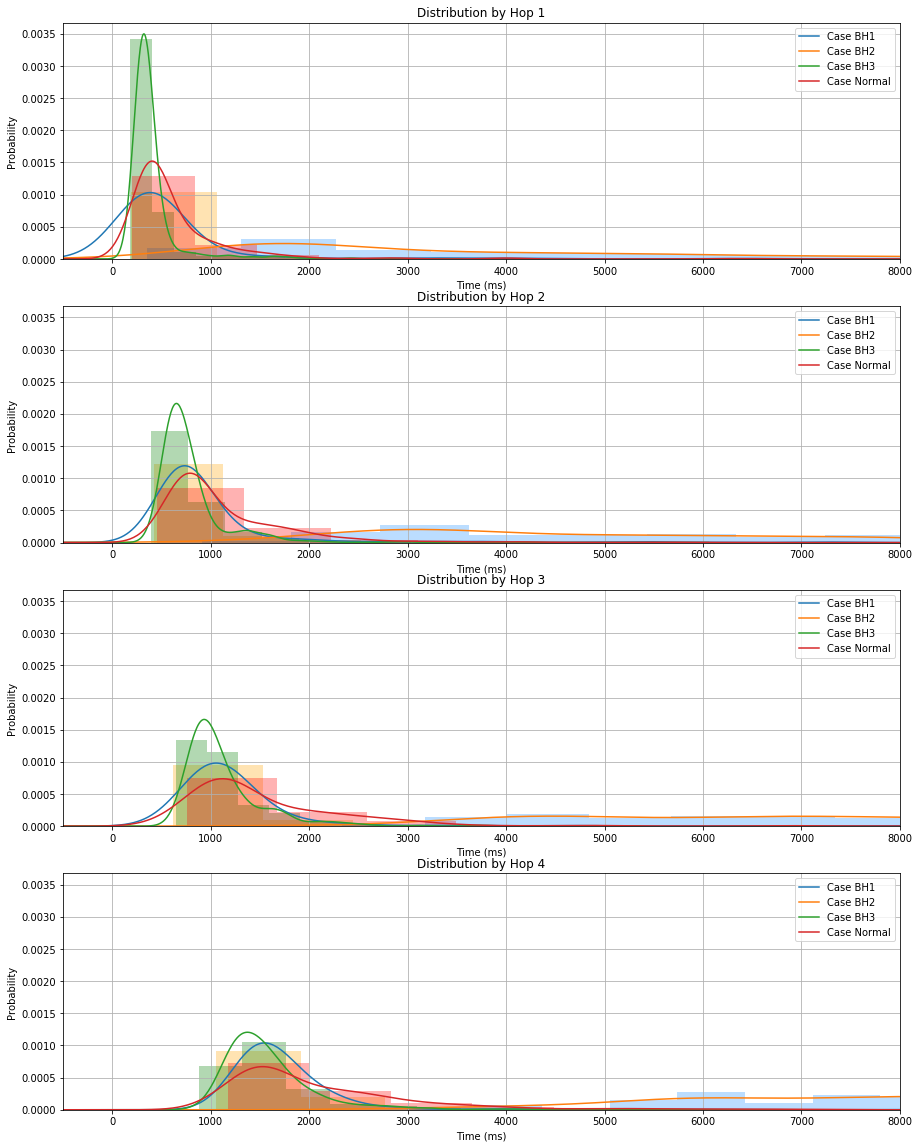

In [10]:
fig, axs= plt.subplots(4,1, figsize=(15,20),sharey=True, )
for i in range(len(dataHop)):
    for j in range(len(dataHop[i])):
        dataHop[i][j]['rtt'].plot.kde(
            ax=axs[j],
            label=casesD[i],
        ) 
        
        dataHop[i][j]["rtt"].hist(density=True,alpha=0.3, ax=axs[j],color=colors[i])
      
        axs[j].set_xlabel("Time (ms)")
        axs[j].set_ylabel("Probability")
        axs[j].set_title("Distribution by Hop "+ str(j+1))
        axs[j].legend()
       
        axs[j].set_xlim([-500, 8000])

Kernel Density Estimation by Case by Node 


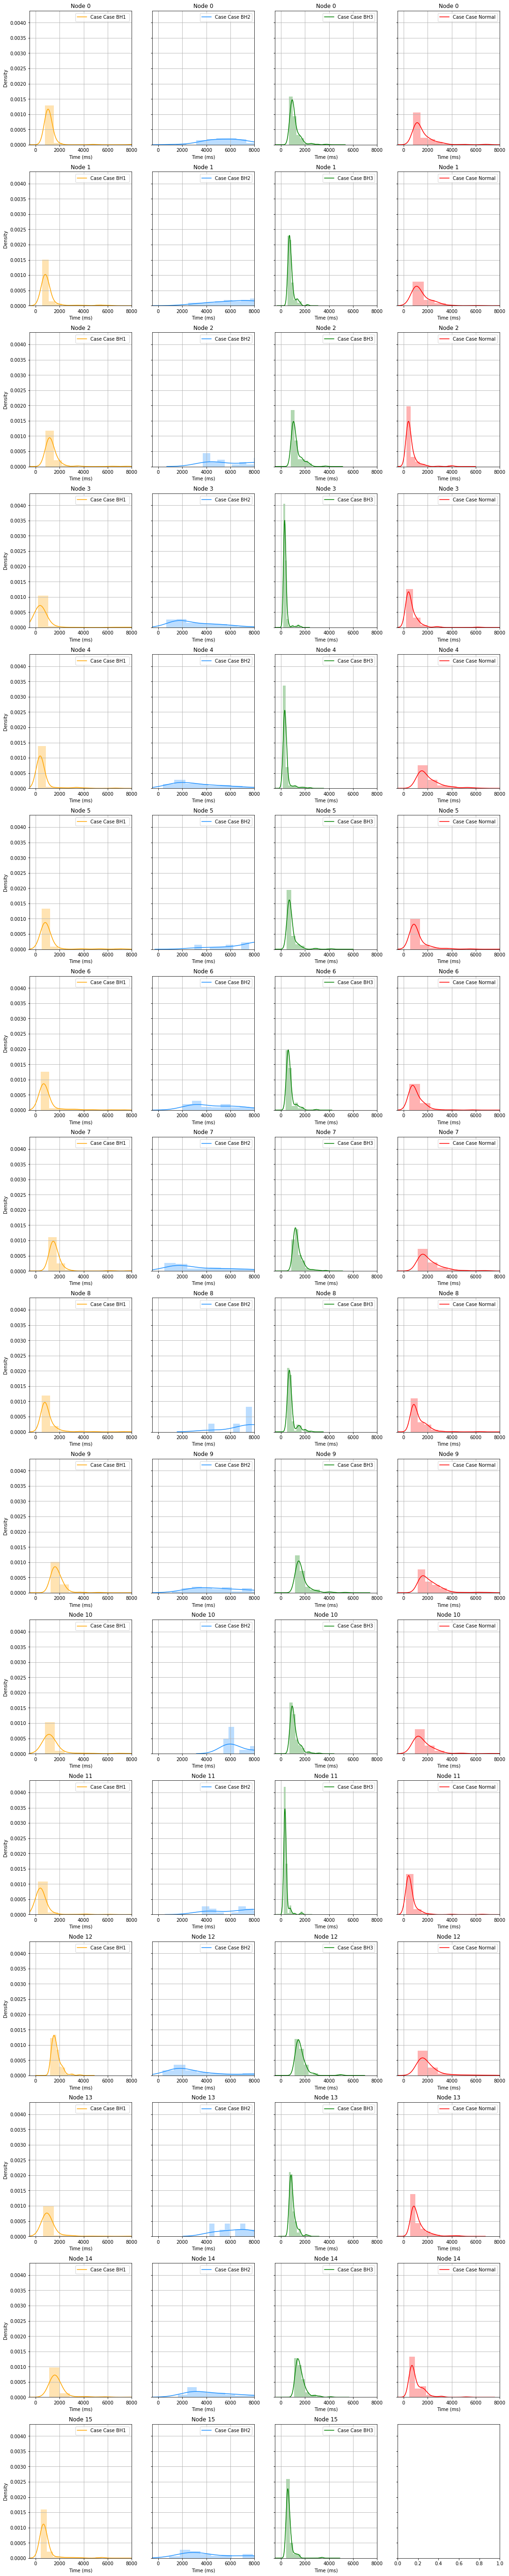

In [11]:
fig, axs= plt.subplots(16,4, figsize=(18,100),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        #print(i,j)
        ax=axs[j][i]
        data[i][j].pkts["rtt"].plot.kde(
            ax=ax,
            label="Case " +str(casesD[i]),
            color=colors[i]
            
        )
        
        ax.set_ylabel("Density")
        data[i][j].pkts["rtt"].hist(density=True,alpha=0.3,color=colors[i], ax=ax)
        ax.set_title("Node "+ str(j) )
        ax.set_xlabel("Time (ms)")
        ax.legend()
        ax.set_xlim([-500, 8000])
        


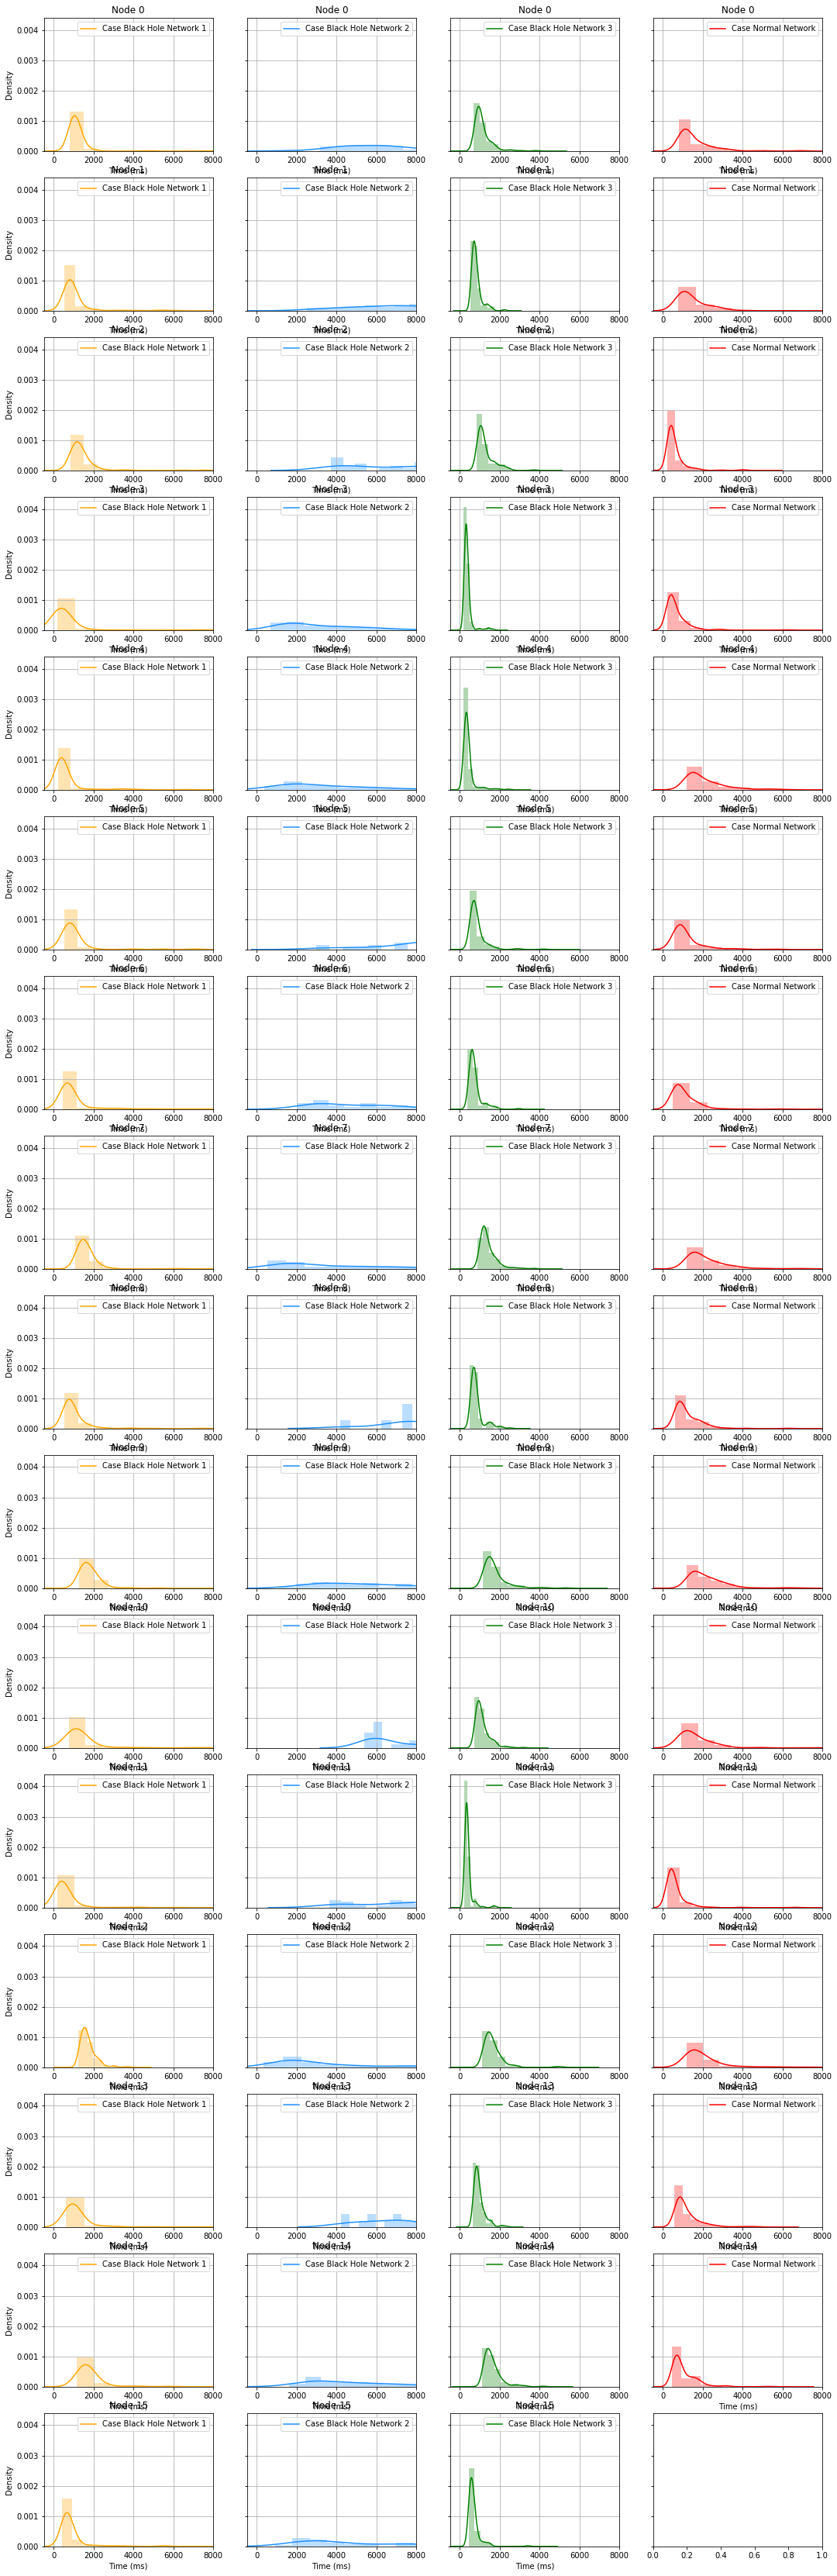